# Data
Import and choosing features and Targets

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data


data = load_data('Auto')

feature_names = ['horsepower', 'weight', 'acceleration']
X, y = data[feature_names],data['mpg']

X

,horsepower,weight,acceleration
name,,,
chevrolet chevelle malibu,130,3504,12.0
buick skylark 320,165,3693,11.5
plymouth satellite,150,3436,11.0
amc rebel sst,150,3433,12.0
ford torino,140,3449,10.5
...,...,...,...
ford mustang gl,86,2790,15.6
vw pickup,52,2130,24.6
dodge rampage,84,2295,11.6


## Data split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


x_train

,horsepower,weight,acceleration
name,,,
dodge aspen,110,3620,18.7
capri ii,92,2572,14.9
ford pinto,97,2984,14.5
plymouth fury iii,150,4135,13.5
plymouth champ,64,1875,16.4
...,...,...,...
amc matador (sw),150,3892,12.5
amc gremlin,100,2789,15.0
oldsmobile starfire sx,85,2855,17.6


# Data visualisation

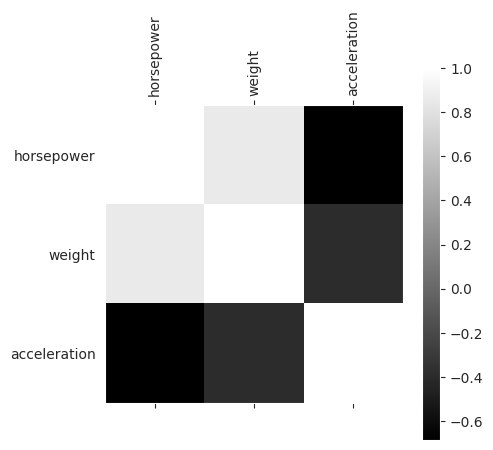

Variance
horsepower       38.283669
weight          841.133957
acceleration      2.817864
dtype: float64


,horsepower,weight,acceleration
horsepower,1.000000,0.856179,-0.685944
weight,0.856179,1.000000,-0.392906
acceleration,-0.685944,-0.392906,1.000000


In [8]:
names = x_train.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="grey")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

print('Variance')
print(df_features.std())
corr_mtx

# Plotting

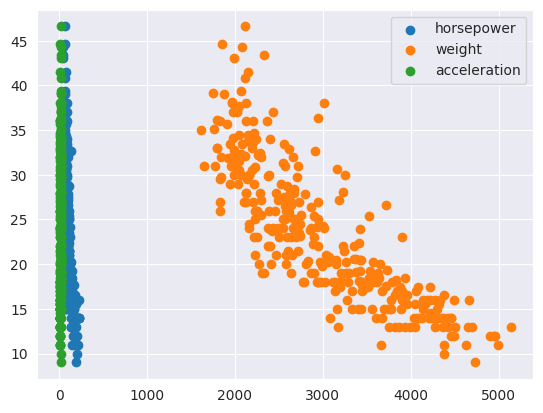

In [10]:
for name in feature_names:
    plt.scatter(x_train[name], y_train, label=name)

plt.legend()
plt.show()